In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [16]:
def get_switches(data):
    columns = ['type', 'sid', 'trial', 'stage', 'neighbors', 'switches']
    dfs = []
    human = pd.read_pickle(f"data/jiang.pkl")
    model_type = data['type'].unique()[0]
    sids = human['sid'].unique()
    for sid in sids:
        # print(f"sid {sid}")
        trials = human.query("sid==@sid")['trial'].unique()
        for trial in trials:
            A_old = 0
            switches = 0
            neighbors = len(human.query("sid==@sid & trial==@trial & stage==1")['who'].unique())
            for stage in range(4):
                subdata = data.query("sid==@sid & trial==@trial & stage==@stage")
                A = subdata['action'].unique()[0]
                if stage>0 and A!=A_old:
                    switches += 1
                dfs.append(pd.DataFrame([[model_type, sid, trial, stage, neighbors, switches]], columns=columns))
                A_old = A
    data_add = pd.concat(dfs, ignore_index=True)
    return data_add

In [20]:
rl_z = get_switches(pd.read_pickle("data/RL_z_jiang_feb24_dynamics.pkl"))
dg_z = get_switches(pd.read_pickle("data/DG_z_jiang_feb24_dynamics.pkl"))
rl_zl = get_switches(pd.read_pickle("data/RL_zl_jiang_feb24_dynamics.pkl"))
h = pd.read_pickle("data/jiang.pkl")
h['type'] = 'human'
human = get_switches(h)
combined = pd.concat([human, dg_z, rl_z, rl_zl], ignore_index=True)

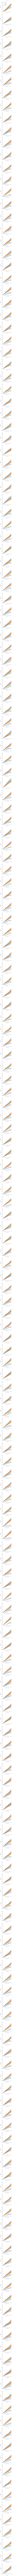

In [24]:
g = sns.FacetGrid(combined, hue="type", row="sid", legend_out=False, palette=palette[:4])
g.map_dataframe(sns.lineplot, x="stage", y='switches')
g.add_legend()

In [27]:
rl_zl_params = pd.read_pickle("data/RL_zl_jiang_feb24_params.pkl")
max_lambda_index = rl_zl_params['lambda'].idxmax()
max_lambda_sid = rl_zl_params.loc[max_lambda_index, 'sid']
print(max_lambda_sid, rl_zl_params['lambda'].max())

94 2.0
